In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Extras/Medicinalplantdataset.zip

In [ ]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Flatten, Dense, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121

In [ ]:
dataset = '/content/Medicinal plant dataset'

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, brightness_range=[0.2, 1.0], horizontal_flip=True,validation_split=0.2)

In [ ]:
train_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='training', shuffle=True)
test_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='validation', shuffle=True)

Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.


In [ ]:
input = Input(shape=(224, 224, 3))
model = keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=input)
model.trainable=True

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
output = model.output
x = Flatten()(output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(40, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=input, outputs=x)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
callbacks = [checkpoint]

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.09)

model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), optimizer='SGD', metrics=['accuracy'])

history = model.fit(train_imgs, epochs=30,
                    validation_data=test_imgs,
                    callbacks=callbacks
                    )

Epoch 1/30
149/149 [==============================] - ETA: 0s - loss: 3.7037 - accuracy: 0.0262
Epoch 1: val_accuracy improved from -inf to 0.02627, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 147s 960ms/step - loss: 3.7037 - accuracy: 0.0262 - val_loss: 3.6579 - val_accuracy: 0.0263
Epoch 2/30
149/149 [==============================] - ETA: 0s - loss: 3.6066 - accuracy: 0.0466
Epoch 2: val_accuracy improved from 0.02627 to 0.07373, saving model to best_model.h5
149/149 [==============================] - 118s 788ms/step - loss: 3.6066 - accuracy: 0.0466 - val_loss: 3.3688 - val_accuracy: 0.0737
Epoch 3/30
149/149 [==============================] - ETA: 0s - loss: 3.2611 - accuracy: 0.1152
Epoch 3: val_accuracy improved from 0.07373 to 0.19661, saving model to best_model.h5
149/149 [==============================] - 118s 792ms/step - loss: 3.2611 - accuracy: 0.1152 - val_loss: 2.7124 - val_accuracy: 0.1966
Epoch 4/30
149/149 [==============================] - ETA: 0s - loss: 2.7078 - accuracy: 0.2529
Epoch 4: val_accuracy improved from 0.19661 to 0.23305, saving model to best_model.h5
149/149 [==============================] - 118s 7

In [ ]:
train_imgs.class_indices

{'Aloevera': 0,
 'Amla': 1,
 'Amruta_Balli': 2,
 'Arali': 3,
 'Ashoka': 4,
 'Ashwagandha': 5,
 'Avacado': 6,
 'Bamboo': 7,
 'Basale': 8,
 'Betel': 9,
 'Betel_Nut': 10,
 'Brahmi': 11,
 'Castor': 12,
 'Curry_Leaf': 13,
 'Doddapatre': 14,
 'Ekka': 15,
 'Ganike': 16,
 'Gauva': 17,
 'Geranium': 18,
 'Henna': 19,
 'Hibiscus': 20,
 'Honge': 21,
 'Insulin': 22,
 'Jasmine': 23,
 'Lemon': 24,
 'Lemon_grass': 25,
 'Mango': 26,
 'Mint': 27,
 'Nagadali': 28,
 'Neem': 29,
 'Nithyapushpa': 30,
 'Nooni': 31,
 'Pappaya': 32,
 'Pepper': 33,
 'Pomegranate': 34,
 'Raktachandini': 35,
 'Rose': 36,
 'Sapota': 37,
 'Tulasi': 38,
 'Wood_sorel': 39}

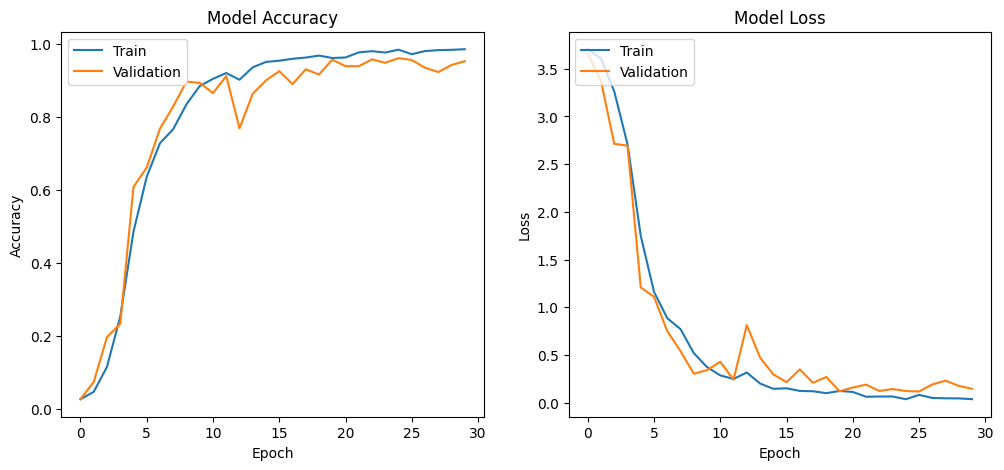

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
plants_model = keras.models.load_model('/content/best_model.h5')
plants_model.save('/content/drive/MyDrive/Extras/VGG16.h5')

In [ ]:
import keras.backend as k
k.clear_session()